In [1]:
import pandas as pd
import numpy as np

In [30]:
path_to_xlsx = "./seoulPopulation.xlsx"
path_to_csv = "./seoulCCTV.csv"
s_pop = pd.read_excel(path_to_xlsx).set_index("자치구")["인구"].loc["종로구":]
s_cctv = pd.read_csv(path_to_csv).set_index("기관명")["소계"]
s_cctv.name = "CCTV Coount"
s_pop.name = "Population"
df = pd.concat([s_pop, s_cctv], axis=1, join="outer").sort_values(
    by="CCTV Coount", ascending=True
)
df

,Population,CCTV Coount
도봉구,348646,485
마포구,389649,574
송파구,667483,618
중랑구,414503,660
중구,133240,671
광진구,372164,707
강북구,330192,748
강동구,453233,773
강서구,603772,884
영등포구,402985,904


In [32]:
# 구별 cctv 개수에 관한 그래프

import matplotlib.pyplot as plt
import matplotlib

# 한글 글꼴 사용
matplotlib.rcParams["font.family"] = "Malgun Gothic"
# 그리드가 있는 스타일 사용
plt.style.use("_mpl-gallery")

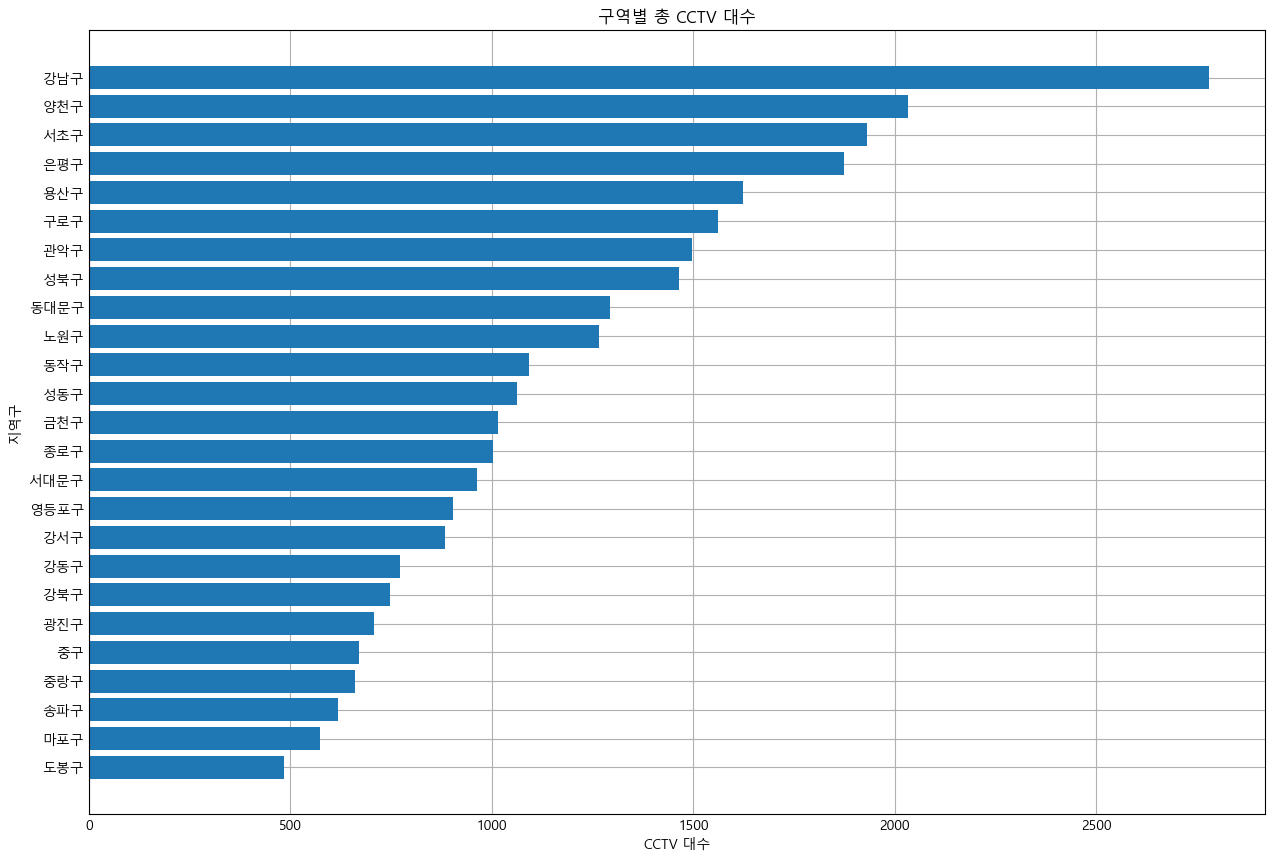

In [35]:
# 총 cctv 개수

plt.figure(figsize=(12, 8))
plt.barh(df.index, df["CCTV Coount"])
plt.title("구역별 총 CCTV 대수")
plt.ylabel("지역구")
plt.xlabel("CCTV 대수")
plt.show()

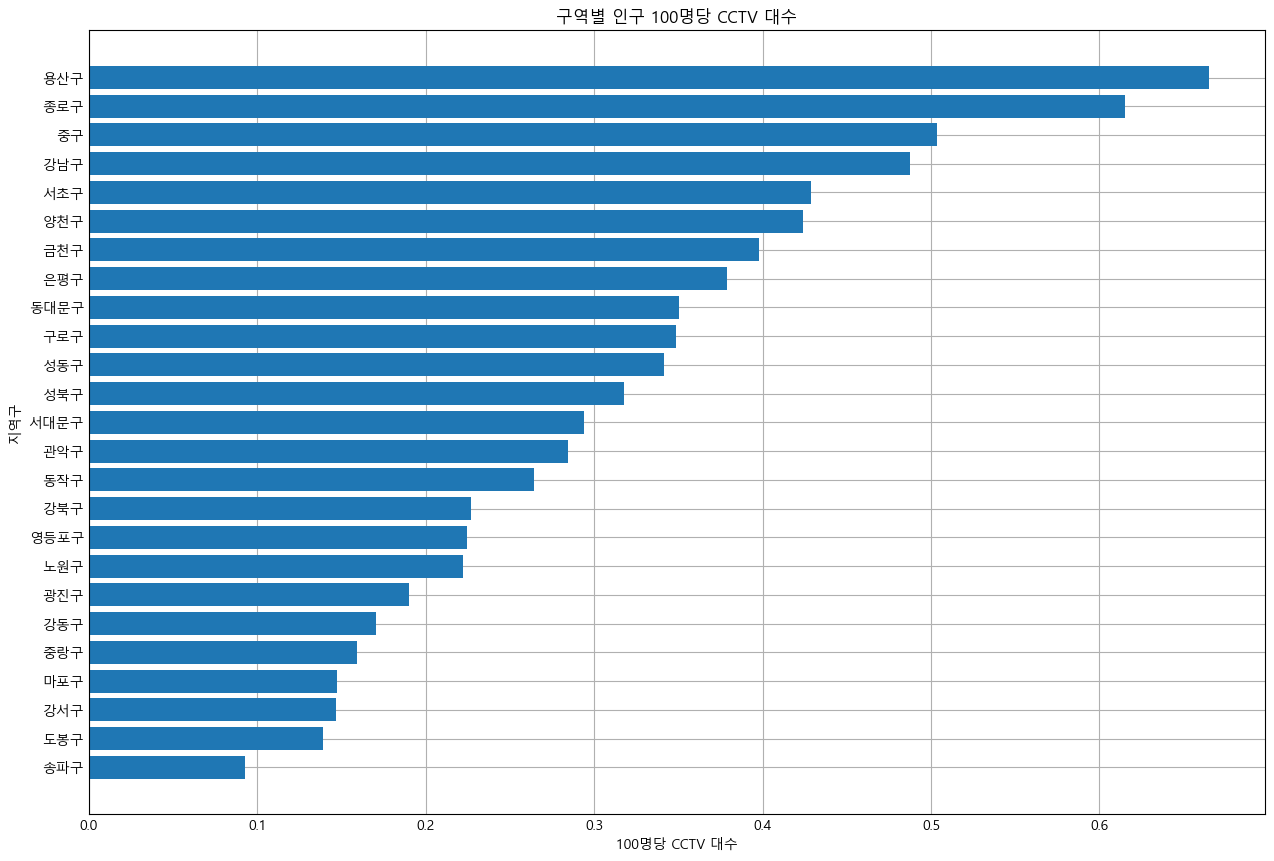

In [36]:
# 인구 100명당 cctv 개수

s_div = df["CCTV Coount"] / df["Population"] * 100
s_div = s_div.sort_values()
plt.figure(figsize=(12, 8))
plt.barh(s_div.index, s_div)
plt.title("구역별 인구 100명당 CCTV 대수")
plt.ylabel("지역구")
plt.xlabel("100명당 CCTV 대수")
plt.show()

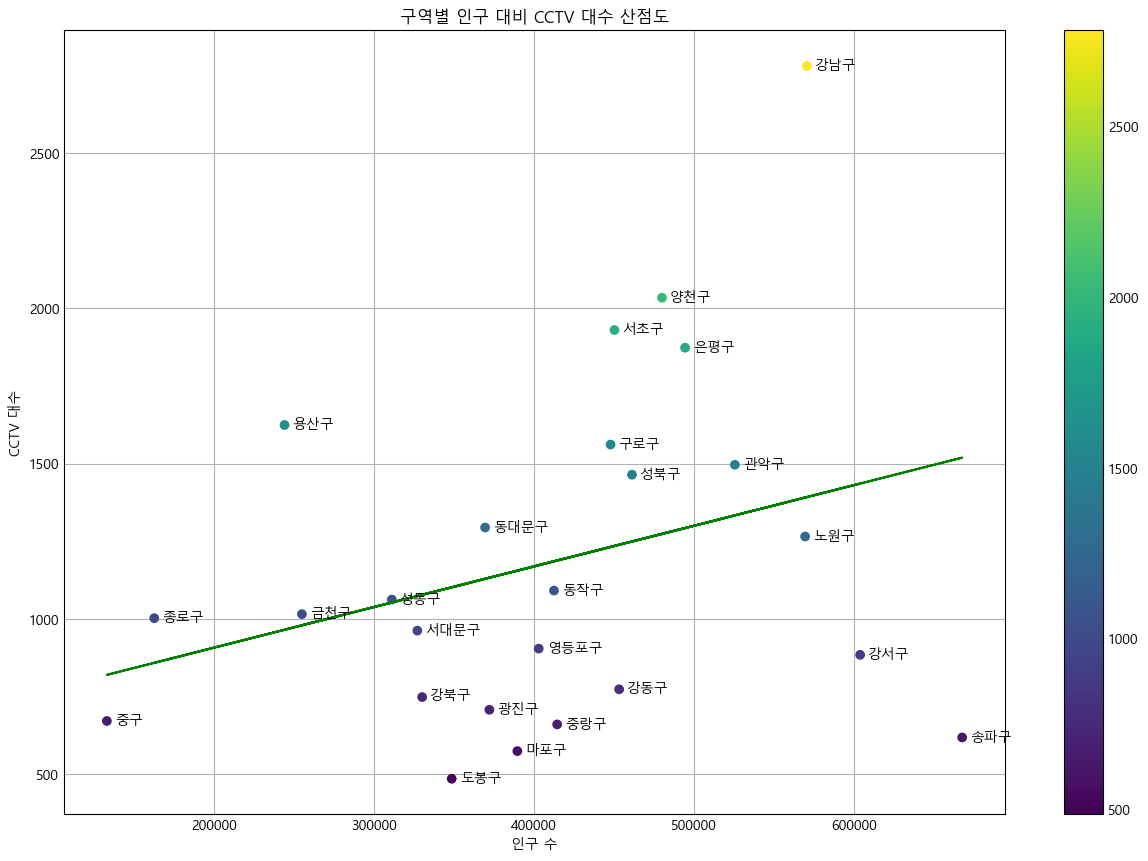

In [37]:
# 인구수 대비 CCTV 대수 산점도
from sklearn.linear_model import LinearRegression

X = df["Population"].values.reshape(-1, 1)  # 독립 변수 (인구), 2D 배열로 변환
y = df["CCTV Coount"].values  # 종속 변수 (CCTV 개수)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
x_offset = 5000
y_offset = -10

plt.figure(figsize=(12, 8))
plt.scatter(df["Population"], df["CCTV Coount"], cmap="viridis", c=df["CCTV Coount"])
for local in df.index:
    pop, cctv = df.loc[local]
    plt.text(pop + x_offset, cctv + y_offset, local)
plt.plot(df["Population"], y_pred, color="green", linestyle="-", label="회귀 직선")
plt.colorbar()
plt.title("구역별 인구 대비 CCTV 대수 산점도")
plt.ylabel("CCTV 대수")
plt.xlabel("인구 수")
plt.show()